*Jeffrey Ching - Application Case Study - Linear Regression Modeling on Effect of Advertising on Sales*

# Apply Regression Analysis on Effects of Advertising on Sales

## Context and Problem
An interesting application of regression is to quantify the effect of advertisement and specific types of advertisement (i.e. TV, Radio) on sales and revenue.  In this case study, we will have a look at the advertising data of a company and try to see its effect on their sales. We will also try to predict the sales given the different types of advertising. 

## Data Information

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- News  - Independent variable quantifying budget for news ads
- Sales - Dependent variable

In [105]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [52]:
data = pd.read_csv('~/Downloads/datasets/advertising_dummydata.csv',index_col=False)
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [53]:
#drop first column which appears to just be an index col
data.drop(data.columns[0], axis=1, inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [55]:
#convert each input variable into a numpy array and reshape 
sales_array = np.array(data["Sales"]).reshape(len(data["Sales"]),1)
tv_array = np.array(data["TV"]).reshape(len(data["TV"]),1)
radio_array = np.array(data["Radio"]).reshape(len(data["Radio"]),1)
newspaper_array = np.array(data["Newspaper"]).reshape(len(data["Newspaper"]),1)

As a first pass, we can try running a simple linear regression model to understand the variance of each feature on sales target

In [56]:
tv_model = linear_model.LinearRegression()
tv_model.fit(tv_array, sales_array)
coeffs_tv = [tv_model.intercept_[0],list(tv_model.coef_.flatten())[0]]

radio_model = linear_model.LinearRegression()
radio_model.fit(radio_array, sales_array)
coeffs_radio = [radio_model.intercept_[0],list(radio_model.coef_.flatten())[0]]

newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(newspaper_array, sales_array)
coeffs_newspaper = [newspaper_model.intercept_[0],list(newspaper_model.coef_.flatten())[0]]

print(coeffs_tv,coeffs_radio,coeffs_newspaper)

[7.0325935491276885, 0.04753664043301979] [9.311638095158285, 0.20249578339243957] [12.35140706927816, 0.05469309847227336]


In [57]:
# calculate the r-squared metric to explain the variance for each input feature
tv_rsq = tv_model.score(tv_array, sales_array)
radio_rsq = radio_model.score(radio_array, sales_array)
newspaper_rsq = newspaper_model.score(newspaper_array, sales_array)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
print(list_rsq)

[0.611875050850071, 0.33203245544529536, 0.05212044544430516]


In [58]:
# display the intercept and coefficients in a table
metric_Df_SLR = pd.DataFrame({"TV":coeffs_tv,"Radio":coeffs_radio,"Newspaper":coeffs_newspaper})
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [59]:
# retrieve the r2-quare score to measure goodness-of-fit for the model
metric_Df_SLR.loc['R-Squared'] = [
    tv_model.score(tv_array, sales_array),
    radio_model.score(radio_array, sales_array),
    newspaper_model.score(newspaper_array,sales_array)
]

In [60]:
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


We can see that TV has the highest R-Squared value at 61%.

Visualize the best fit line using a regression plot

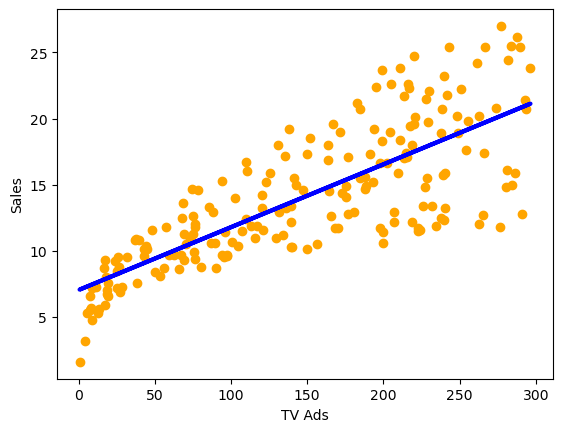

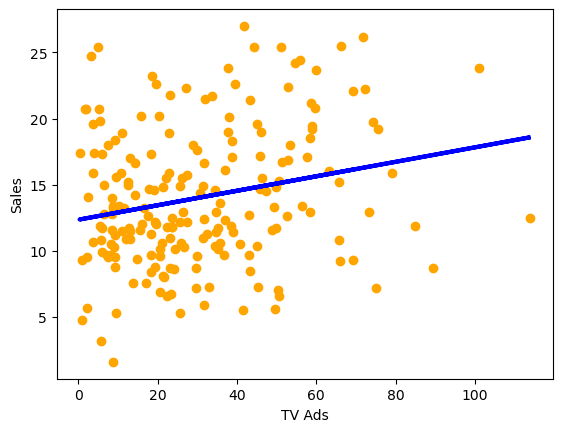

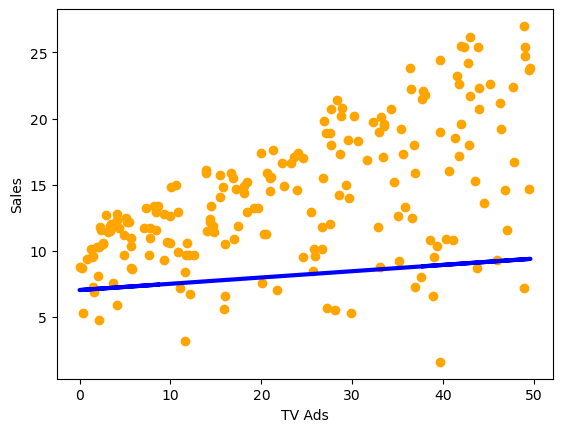

In [61]:
#scatterplot for each feature
plt.scatter(tv_array, sales_array,color='orange')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(tv_array, tv_model.predict(tv_array), color='blue', linewidth=3)
plt.show()

plt.scatter(newspaper_array, sales_array, color='orange')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(newspaper_array, newspaper_model.predict(newspaper_array), color='blue', linewidth=3)
plt.show()

plt.scatter(radio_array, sales_array,  color='orange')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(radio_array, tv_model.predict(radio_array), color='blue', linewidth=3)
plt.show()

We can see that TV Ads shows the strongest correlation to Sales and linear regression model fitting to majority of data points.

We can also visualize the confidence bands for the simple linear regression model for each feature.

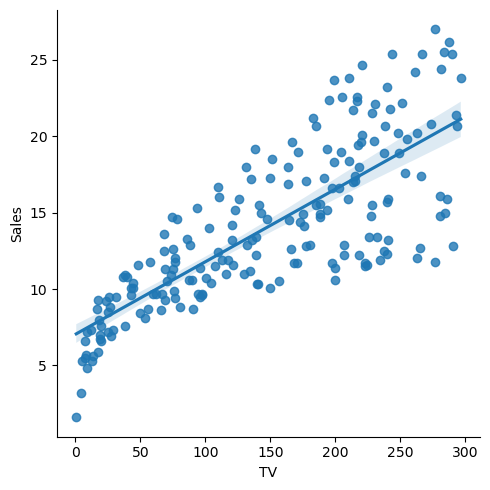

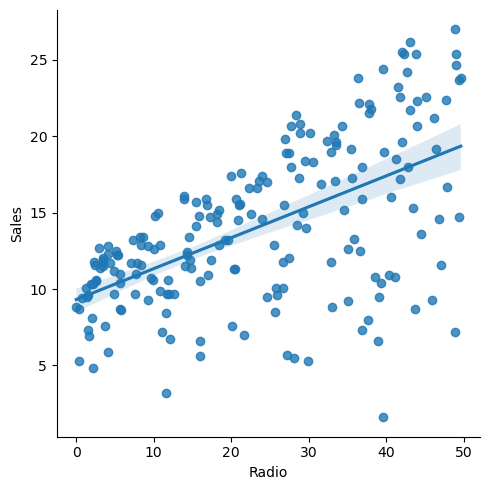

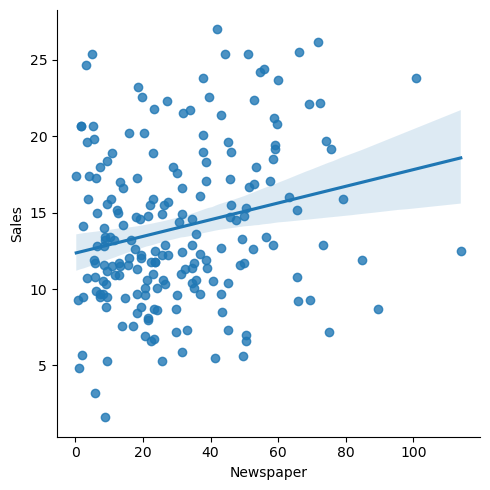

In [62]:
import seaborn as sns
sns.lmplot(x = 'TV', y = 'Sales', data = data)
sns.lmplot(x = 'Radio', y = 'Sales', data = data)
sns.lmplot(x = 'Newspaper', y = 'Sales', data = data)

## Multiple Linear Regression

- Let us now consider combinations of features in a multiple linear regression model.

In [64]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(data[['TV', 'Radio', 'Newspaper']], data['Sales'])

LinearRegression()

In [65]:
sales_predicted = mlr_model.predict(data[['TV', 'Radio', 'Newspaper']]) #predicte sales 
mlr_model_mse = ((sales_predicted - data['Sales'])**2).mean() #calculate MSE
print(mlr_model_mse)

2.784126314510936


In [66]:
mlr_model.score(data[['TV', 'Radio', 'Newspaper']], data['Sales'])

0.8972106381789522

The R-rsquared value for the multiple linear regression model is 89.7%, which is a significant score improvement over the simple linear regression models where the highest is 61%.

In [67]:
# Use statsmodel to get a more detailed model interpretation
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = data).fit()
lm1.params
print(lm1.summary()) #print the results of the multiple linear regression model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        14:43:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [68]:
print("Error Covariance Matrix:")
print(lm1.cov_params())

Error Covariance Matrix:
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875e-05


We see there is not really a strong covariance among the features which are all negative.

# Model Evaluation: Cross Validation and Bootstrapping

- We can omit newspapers from the list of significant features due to high p-value.
- Let us now run the regression analysis adding a multiplicative feature in it (TV and Radio).

In [69]:
data['TVandRadio'] = data['TV'] * data['Radio']

In [103]:
# Run the regression analysis including the multiplicative feature
lm2 = smf.ols(formula= 'Sales ~ TV+Radio+TVandRadio', data = data).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.68e-146
Time:                        15:14:58   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

**Observations**
- The model score improved to 96.8% using the new feature set. We can apply this model to predict on unseen data and evaluate performance.

## Performance assessment, testing and validation

### Train, Test, and Validation set
- We will split data into three sets, one to train the model, one to validate the model performance (not seen during training) and make improvements, and the last to test the model.

In [72]:
from sklearn.model_selection import train_test_split

In [75]:
features_base = [i for i in data.columns if i not in ("Sales" , "TVandRadio")]
features_added = [i for i in data.columns if i not in "Sales"]
target  = 'Sales'

In [81]:
print(features_base)
print(features_added)

['TV', 'Radio', 'Newspaper']
['TV', 'Radio', 'Newspaper', 'TVandRadio']


In [76]:
#create train and test split
train, test = train_test_split(data, test_size = 0.10, train_size = 0.9)
#split the train into a train and validation group
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [77]:
print(train.shape, validation.shape, test.shape)

(144, 5) (36, 5) (20, 5)


In [89]:
# model on the base features
mlr = LinearRegression()
mlr.fit(train[features_base], train[target])

print("Training Set Metrics")
print("R-Squared:", mlr.score(train[features_base], train[target]))
mse_train = ((train[target] - mlr.predict(train[features_base]))**2).mean()
print('MSE: ', mse_train, "\n")
print("Validation Set Metrics")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
mse_val = ((validation[target] - mlr.predict(validation[features_base]))**2).mean()
print('MSE: ', mse_val)

Training Set Metrics
R-Squared: 0.8948803514586078
MSE:  2.873816624277334 

Validation Set Metrics
R-Squared: 0.9031700174468006
MSE:  2.384480160488453


In [90]:
# model on the added feature
mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])

print("Training Set Metrics")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
mse_train = ((train[target] - mlr_added_feature.predict(train[features_added]))**2).mean()
print('MSE: ', mse_train, "\n")
print("Validation Set Metrics")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
mse_val = ((validation[target] - mlr_added_feature.predict(validation[features_added]))**2).mean()
print('MSE: ', mse_val)

Training Set Metrics
R-Squared: 0.9649985142261059
MSE:  0.9568891552354791 

Validation Set Metrics
R-Squared: 0.9756735316304324
MSE:  0.5990497950375535


**Observations**
- We found the R-squared increased as we would expect after adding a feature. Also the error decreased. As a next step we can fit a regularized model. Regularization improves the conditioning of the problem and reduces the variance of the estimates.

## Regularization 

In [93]:
#apply ridge regression as regularized linear model
ridge = Ridge()
ridge.fit(train[features_added], train[target])

print("Training Set Metrics")
print("R-Squared:", ridge.score(train[features_added], train[target]))
mse_train = ((train[target] - ridge.predict(train[features_added]))**2).mean()
print('MSE: ', mse_train, "\n")
print("Validation Set Metrics")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
mse_val = ((validation[target] - ridge.predict(validation[features_added]))**2).mean()
print('MSE: ', mse_val)

Training Set Metrics
R-Squared: 0.964998514197946
MSE:  0.9568891560053299 

Validation Set Metrics
R-Squared: 0.9756736157684426
MSE:  0.5990477231026964


In [95]:
#apply lasso regression as regularized linear model
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print("Training Set Metrics")
print("R-Squared:", lasso.score(train[features_added], train[target]))
mse_train = ((train[target] - lasso.predict(train[features_added]))**2).mean()
print('MSE: ', mse_train, "\n")
print("Validation Set Metrics")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
mse_val = ((validation[target] - lasso.predict(validation[features_added]))**2).mean()
print('MSE: ', mse_val)

Training Set Metrics
R-Squared: 0.9642315553441297
MSE:  0.9778566833403003 

Validation Set Metrics
R-Squared: 0.9755639257435352
MSE:  0.6017488873629621


In [107]:
#Let us predict on the test dataset using the ridge regression model

rsq_test = ridge.score(test[features_added], test[target])
mse_test = ((test[target] - ridge.predict(test[features_added]))**2).mean()

print("Test Set Metrics")
print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

Test Set Metrics
Rsquared:  0.9696452994534791
MSE:  0.8212039267053584
Intercept is 6.531082656152065 and Coefficients are [0.01997613 0.02855142 0.00485855 0.00106901]


In [101]:
#Let us predict on the test dataset using the lasso regression model

lsq_test = lasso.score(test[features_added], test[target])
mse_test = ((test[target] - lasso.predict(test[features_added]))**2).mean()

print("Test Set Metrics")
print("Rsquared: ", lsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(lasso.intercept_, lasso.coef_))

Test Set Metrics
Rsquared:  0.971903284583586
MSE:  0.7601173001894977
Intercept is 6.997622320576701 and Coefficients are [0.01749238 0.01102368 0.00379873 0.00116613]


- We will now evaluate the performance by applying cross-validation.

In [113]:
lasso_cvs = cross_val_score(lasso, data[features_added], data[target], cv = 10)
print("Mean Score:")
print(lasso_cvs.mean(), "\n") #take the mean score
print("Confidence Interval:")
lasso_cvs.mean() - lasso_cvs.std(), lasso_cvs.mean() + lasso_cvs.std() 

Mean Score:
0.9640695779748925 

Confidence Interval:


(0.9447780346186297, 0.9833611213311552)

In [114]:
ridge_cvs = cross_val_score(ridge, data[features_added], data[target], cv = 10)
print("Mean Score:")
print(ridge_cvs.mean(), "\n") #take the mean score
print("Confidence Interval:")
ridge_cvs.mean() - ridge_cvs.std(), ridge_cvs.mean() + ridge_cvs.std() 

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799696, 0.9869301815715691)

**Summary**
- The model is able to predict with a high accuracy of 96% on net sales based on the regression model with the created feature and applying regularization.